# Load Simple Workflow

## Plot

In [1]:
from python_workflow_definition.plot import plot

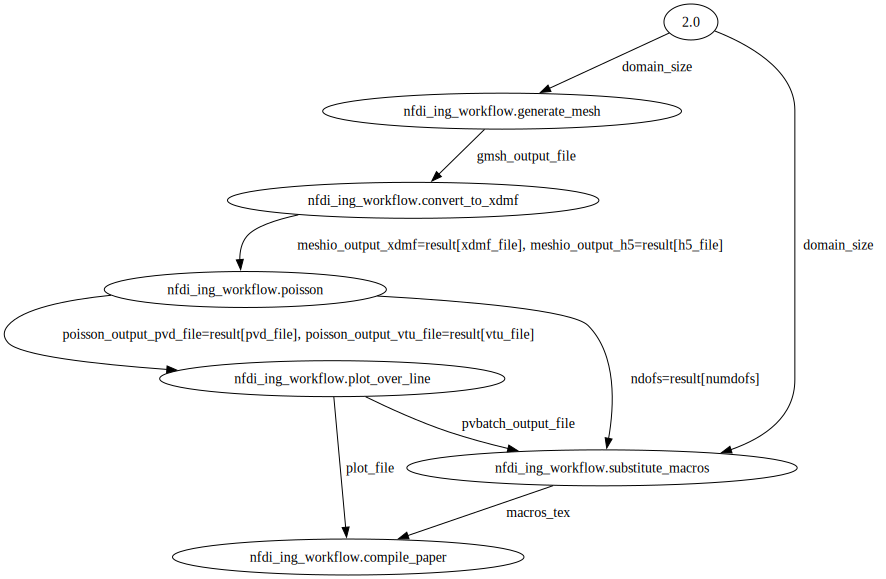

In [2]:
plot(file_name='workflow.json')

## Aiida 

In [3]:
from python_workflow_definition.aiida import load_workflow_json

from aiida import load_profile
load_profile()

Profile<uuid='5b8a8d98b3014876a9eed7d85a954e5e' name='pwd'>

In [4]:
workgraph = load_workflow_json(file_name='workflow.json')

In [5]:
# TODO: Create inputs rather than tasks out of data nodes
workgraph

NodeGraphWidget(settings={'minimap': True}, style={'width': '90%', 'height': '600px'}, value={'name': 'WorkGra…

In [6]:

workgraph.run()

04/23/2025 09:52:22 AM <6139> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [284|WorkGraphEngine|continue_workgraph]: tasks ready to run: generate_mesh1
04/23/2025 09:52:24 AM <6139> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [284|WorkGraphEngine|update_task_state]: Task: generate_mesh1, type: PyFunction, finished.
04/23/2025 09:52:24 AM <6139> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [284|WorkGraphEngine|continue_workgraph]: tasks ready to run: convert_to_xdmf2
04/23/2025 09:52:26 AM <6139> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [284|WorkGraphEngine|update_task_state]: Task: convert_to_xdmf2, type: PyFunction, finished.
04/23/2025 09:52:26 AM <6139> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [284|WorkGraphEngine|continue_workgraph]: tasks ready to run: poisson3
04/23/2025 09:52:30 AM <6139> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [284|Wo

## executorlib

In [7]:
from executorlib import SingleNodeExecutor

In [8]:
from python_workflow_definition.executorlib import load_workflow_json

In [9]:
with SingleNodeExecutor(max_workers=1) as exe:
    result = load_workflow_json(file_name="workflow.json", exe=exe).result()

In [10]:
result

'/home/jovyan/postprocessing/paper.pdf'

## Jobflow

In [11]:
from jobflow.managers.local import run_locally

/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "class": algorithms.TripleDES,


In [12]:
from python_workflow_definition.jobflow import load_workflow_json

In [13]:
flow = load_workflow_json(file_name="workflow.json")

In [14]:
result = run_locally(flow)
result

2025-04-23 09:52:59,822 INFO Started executing jobs locally
2025-04-23 09:52:59,957 INFO Starting job - generate_mesh (3dfb7e61-0ac4-48e8-90b9-5dc1c8e9cc3a)
2025-04-23 09:53:01,321 INFO Finished job - generate_mesh (3dfb7e61-0ac4-48e8-90b9-5dc1c8e9cc3a)
2025-04-23 09:53:01,325 INFO Starting job - convert_to_xdmf (2457090f-84ec-40dc-87dc-16e1ecd5c5ef)
2025-04-23 09:53:03,102 INFO Finished job - convert_to_xdmf (2457090f-84ec-40dc-87dc-16e1ecd5c5ef)
2025-04-23 09:53:03,103 INFO Starting job - poisson (ddd8574c-2717-4d3c-a638-2e55670ae679)
2025-04-23 09:53:06,212 INFO Finished job - poisson (ddd8574c-2717-4d3c-a638-2e55670ae679)
2025-04-23 09:53:06,213 INFO Starting job - plot_over_line (669dc5b4-0fe1-41fa-8861-305009122991)
2025-04-23 09:53:08,100 INFO Finished job - plot_over_line (669dc5b4-0fe1-41fa-8861-305009122991)
2025-04-23 09:53:08,101 INFO Starting job - substitute_macros (bb6ad245-506d-4524-ae3e-e54bc4fcea61)
2025-04-23 09:53:09,122 INFO Finished job - substitute_macros (bb6ad2

{'3dfb7e61-0ac4-48e8-90b9-5dc1c8e9cc3a': {1: Response(output='/home/jovyan/preprocessing/square.msh', detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan'))},
 '2457090f-84ec-40dc-87dc-16e1ecd5c5ef': {1: Response(output={'xdmf_file': '/home/jovyan/preprocessing/square.xdmf', 'h5_file': '/home/jovyan/preprocessing/square.h5'}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan'))},
 'ddd8574c-2717-4d3c-a638-2e55670ae679': {1: Response(output={'numdofs': 357, 'pvd_file': '/home/jovyan/processing/poisson.pvd', 'vtu_file': '/home/jovyan/processing/poisson000000.vtu'}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan'))},
 '669dc5b4-0fe1-41fa-8861-305009122991': {1: Response(output='/home/jovyan/postprocessing/plotoverline.csv', detour=None, additi

## pyiron

In [15]:
from python_workflow_definition.pyiron_base import load_workflow_json

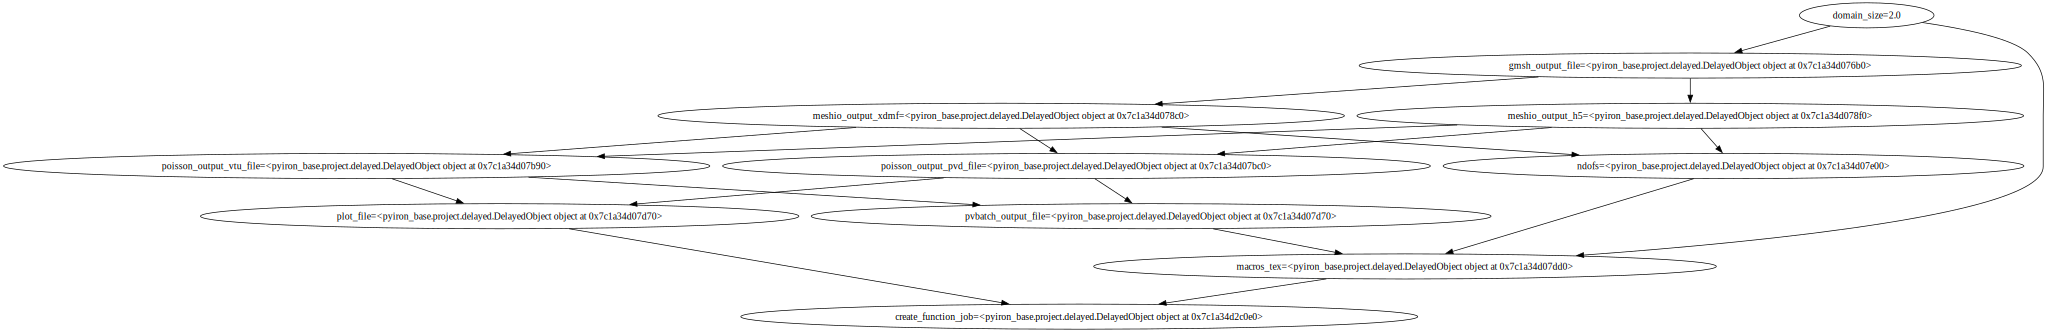

In [16]:
delayed_object_lst = load_workflow_json(file_name="workflow.json")
delayed_object_lst[-1].draw()

In [17]:
delayed_object_lst[-1].pull()

The job generate_mesh_0b48cf5155cd6802c17d20bb58104132 was saved and received the ID: 1
The job convert_to_xdmf_29ad6ec6927268429dc9aef8166fde43 was saved and received the ID: 2
The job poisson_a0224b23ceb2119d105a5d98ef37f93e was saved and received the ID: 3
The job plot_over_line_82b37a42e0747f11d9a7f6318f63ac6b was saved and received the ID: 4
The job substitute_macros_874fc185ecec04b4cb9537c58b7efb7b was saved and received the ID: 5
The job compile_paper_3cee534ffe692833d37faf1fd2170cb6 was saved and received the ID: 6


'/home/jovyan/postprocessing/paper.pdf'

## Python

In [18]:
from python_workflow_definition.purepython import load_workflow_json

In [19]:
load_workflow_json(file_name="workflow.json")

'/home/jovyan/postprocessing/paper.pdf'